In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
np.random.seed(1024)

C:\Users\jmmea\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X = np.random.randint(5,95,500).reshape(-1,1)
data = pd.DataFrame(X)
data[1] = data[0] * 0.5 + np.random.normal(0,8,500)
data[2] = data[0] * 0.5 + 0.03 * data[0] * np.random.normal(0,5,500)
data[3] = data[0] * 0.5 + (0.002 * (data[0] - 50) * (data[0] - 50) + 1) * np.random.normal(0,5,500)
data.columns = ["X", "Y_hom", "Y_het", "Y_bow"]

Text(0.5,0,'Quadratic heteroscedasticity')

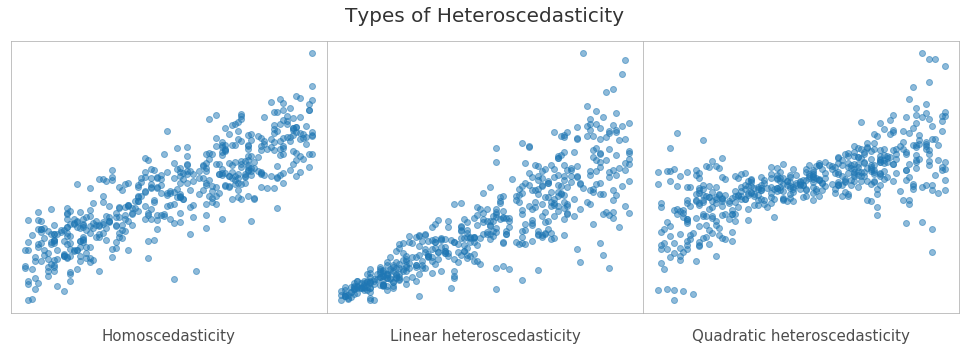

In [14]:
matplotlib.rc('axes',edgecolor= (0.7,0.7,0.7))
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (17,5))
ax1.scatter(data["X"], data["Y_hom"], alpha = 0.5)
ax2.scatter(data["X"], data["Y_het"], alpha = 0.5)
ax3.scatter(data["X"], data["Y_bow"], alpha = 0.5)
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_yticks([])
ax2.set_xticks([])
ax3.set_yticks([])
ax3.set_xticks([])
plt.subplots_adjust(wspace=0)
ax2.set_title("Types of Heteroscedasticity", y = 1.05, fontsize = 20, color = (0.2,0.2,0.2))
ax1.set_xlabel("Homoscedasticity", labelpad = 15, fontsize = 15, color = (0.3,0.3,0.3))
ax2.set_xlabel("Linear heteroscedasticity", labelpad = 15, fontsize = 15, color = (0.3,0.3,0.3))
ax3.set_xlabel("Quadratic heteroscedasticity", labelpad = 15, fontsize = 15, color = (0.3,0.3,0.3))

In [4]:
X = data["X"]
Y1 = data["Y_hom"]
Y2 = data["Y_het"]
Y3 = data["Y_bow"]
m1 = sm.OLS(Y1, X).fit()
m2 = sm.OLS(Y2, X).fit()
m3 = sm.OLS(Y3, X).fit()
g1 = m1.get_robustcov_results(cov_type = "HC0")
g2 = m2.get_robustcov_results(cov_type = "HC0")
g3 = m3.get_robustcov_results(cov_type = "HC0")

In [11]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_hom   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     6086.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          1.03e-281
Time:                        13:36:24   Log-Likelihood:                -1740.4
No. Observations:                 500   AIC:                             3483.
Df Residuals:                     499   BIC:                             3487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.4897      0.006     78.014      0.000       0.477       0.502
==============================================================================
Omnibus:                        5.156   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.875
Skew:                          -0.127   Prob(JB):                       0.0530
Kurtosis:                       3.466   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_hom   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     5488.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          2.14e-271
Time:                        13:36:27   Log-Likelihood:                -1740.4
No. Observations:                 500   AIC:                             3483.
Df Residuals:                     499   BIC:                             3487.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.4897      0.007     74.082      0.000       0.477       0.503
==============================================================================
Omnibus:                        5.156   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.875
Skew:                          -0.127   Prob(JB):                       0.0530
Kurtosis:                       3.466   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [7]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_het   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     5961.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          1.24e-279
Time:                        13:33:40   Log-Likelihood:                -1764.8
No. Observations:                 500   AIC:                             3532.
Df Residuals:                     499   BIC:                             3536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.5089      0.007     77.208      0.000       0.496       0.522
==============================================================================
Omnibus:                       39.377   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.462
Skew:                           0.213   Prob(JB):                     5.78e-33
Kurtosis:                       5.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
g2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_het   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3466.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          9.86e-227
Time:                        13:33:40   Log-Likelihood:                -1764.8
No. Observations:                 500   AIC:                             3532.
Df Residuals:                     499   BIC:                             3536.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.5089      0.009     58.873      0.000       0.492       0.526
==============================================================================
Omnibus:                       39.377   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.462
Skew:                           0.213   Prob(JB):                     5.78e-33
Kurtosis:                       5.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [9]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_bow   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     2022.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          1.26e-177
Time:                        13:33:41   Log-Likelihood:                -2013.8
No. Observations:                 500   AIC:                             4030.
Df Residuals:                     499   BIC:                             4034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.4876      0.011     44.963      0.000       0.466       0.509
==============================================================================
Omnibus:                       33.735   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.322
Skew:                          -0.058   Prob(JB):                     1.37e-28
Kurtosis:                       5.479   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
g3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_bow   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          2.89e-162
Time:                        13:33:41   Log-Likelihood:                -2013.8
No. Observations:                 500   AIC:                             4030.
Df Residuals:                     499   BIC:                             4034.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.4876      0.012     41.093      0.000       0.464       0.511
==============================================================================
Omnibus:                       33.735   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.322
Skew:                          -0.058   Prob(JB):                     1.37e-28
Kurtosis:                       5.479   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""